<a href="https://colab.research.google.com/github/SAGAR-NAYAK2000/K-means-Spectral-clustering-on-twitter-dataset/blob/main/Sagar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports

#Computing
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

#Clustering
from sklearn.cluster import KMeans,SpectralClustering
from yellowbrick.cluster import KElbowVisualizer

#Decomposition
from sklearn.decomposition import PCA, TruncatedSVD

#Text
import unicodedata, re, string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

#Default

import os


In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df1 = pd.read_csv('/content/gdrive/MyDrive/data/text_classification_dataset.csv')

In [ ]:
df1.head()

,text,type
0,@ACNI2012 @TheToka920 Never knew having 1 or 2...,sports
1,"MYCA Magical Moments:\n\nSeptember, 2011: Sham...",sports
2,The current state of last year's @BBL finalist...,sports
3,@HOLLYJISOO Why did you bring a cricket...,sports
4,Babar Azam only Pakistani included in the ICC ...,sports


In [ ]:
df1.info

<bound method DataFrame.info of                                                    text    type
0     @ACNI2012 @TheToka920 Never knew having 1 or 2...  sports
1     MYCA Magical Moments:\n\nSeptember, 2011: Sham...  sports
2     The current state of last year's @BBL finalist...  sports
3            @HOLLYJISOO Why did you bring a cricket...  sports
4     Babar Azam only Pakistani included in the ICC ...  sports
...                                                 ...     ...
1157  The senior is one of the most decorated male t...  sports
1158  2020 COULD be your year to get moving and chan...  sports
1159  RT @MailSport: 'I thought you liked yellow on ...  sports
1160  RT @BBCSport: ❤️ \n\nTennis greats played toge...  sports
1161  RT @MattRacquet: A thread on hard court slidin...  sports

[1162 rows x 2 columns]>

Function to clean the text, Taken by : https://www.kaggle.com/oragula/sentiment-analysis-rotten-tomato-movie-reviews

In [ ]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def remove_len_2(words):
    """Remove all the words with len <= 2"""
    new_words = []
    for word in words:
        if len(word)<=2:
            pass
        else:
            new_words.append(word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_numbers(words):
    """Remove all interger occurrences in list of tokenized words with textual representation"""
    new_words = []
    for word in words:
        new_word = re.sub("\d+", "", word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = remove_len_2(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_numbers(words)
    words = remove_stopwords(words)
    return words

In [ ]:
df1.head(5)

,text,type
0,@ACNI2012 @TheToka920 Never knew having 1 or 2...,sports
1,"MYCA Magical Moments:\n\nSeptember, 2011: Sham...",sports
2,The current state of last year's @BBL finalist...,sports
3,@HOLLYJISOO Why did you bring a cricket...,sports
4,Babar Azam only Pakistani included in the ICC ...,sports


In [ ]:
 #Tokenize text
 import nltk
 nltk.download('punkt')
df1['Tokenized']=df1['text'].apply(nltk.word_tokenize)
df1.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,type,Tokenized
0,@ACNI2012 @TheToka920 Never knew having 1 or 2...,sports,"[@, ACNI2012, @, TheToka920, Never, knew, havi..."
1,"MYCA Magical Moments:\n\nSeptember, 2011: Sham...",sports,"[MYCA, Magical, Moments, :, September, ,, 2011..."
2,The current state of last year's @BBL finalist...,sports,"[The, current, state, of, last, year, 's, @, B..."
3,@HOLLYJISOO Why did you bring a cricket...,sports,"[@, HOLLYJISOO, Why, did, you, bring, a, crick..."
4,Babar Azam only Pakistani included in the ICC ...,sports,"[Babar, Azam, only, Pakistani, included, in, t..."


In [ ]:
#Normalize text
import nltk
nltk.download('stopwords')
df1['Clean_text']=df1['Tokenized'].apply(lambda y: normalize(y))
df1['Clean_text'][:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [acni, thetoka, never, knew, followers, anythi...
1    [myca, magical, moments, september, sham, chot...
2    [current, state, last, year, bbl, finalists, s...
3                         [hollyjisoo, bring, cricket]
4    [babar, azam, pakistani, included, icc, odi, t...
5    [iexpresssports, indvaus, rishabh, pant, ruled...
6    [thinkboisefirst, boisefryco, amp, idaho, comp...
7    [gabbbarsingh, surprised, lot, people, nt, see...
8    [bcci, icc, odi, cricketer, year, award, goes,...
9    [wajidafridi, yearofteamisf, imran, khan, play...
Name: Clean_text, dtype: object

In [ ]:
df1

,text,type,Tokenized,Clean_text
0,@ACNI2012 @TheToka920 Never knew having 1 or 2...,sports,"[@, ACNI2012, @, TheToka920, Never, knew, havi...","[acni, thetoka, never, knew, followers, anythi..."
1,"MYCA Magical Moments:\n\nSeptember, 2011: Sham...",sports,"[MYCA, Magical, Moments, :, September, ,, 2011...","[myca, magical, moments, september, sham, chot..."
2,The current state of last year's @BBL finalist...,sports,"[The, current, state, of, last, year, 's, @, B...","[current, state, last, year, bbl, finalists, s..."
3,@HOLLYJISOO Why did you bring a cricket...,sports,"[@, HOLLYJISOO, Why, did, you, bring, a, crick...","[hollyjisoo, bring, cricket]"
4,Babar Azam only Pakistani included in the ICC ...,sports,"[Babar, Azam, only, Pakistani, included, in, t...","[babar, azam, pakistani, included, icc, odi, t..."
...,...,...,...,...
1157,The senior is one of the most decorated male t...,sports,"[The, senior, is, one, of, the, most, decorate...","[senior, one, decorated, male, tennis, players..."
1158,2020 COULD be your year to get moving and chan...,sports,"[2020, COULD, be, your, year, to, get, moving,...","[could, year, get, moving, change, lives, anim..."
1159,RT @MailSport: 'I thought you liked yellow on ...,sports,"[RT, @, MailSport, :, ', I, thought, you, like...","[mailsport, thought, liked, yellow, ok, grigor..."
1160,RT @BBCSport: ❤️ \n\nTennis greats played toge...,sports,"[RT, @, BBCSport, :, ❤️, Tennis, greats, playe...","[bbcsport, tennis, greats, played, together, r..."


In [ ]:
"""Function to reconvert a tokenization into a single string
This is needed for the TfIdfVectorizer method """
def conv2str(y):  
     
    str1 = " "   
    return (str1.join(y)) 

In [ ]:
df1['Clean_text1']=df1['Clean_text'].apply(lambda y: conv2str(y))
df1.head()

,text,type,Tokenized,Clean_text,Clean_text1
0,@ACNI2012 @TheToka920 Never knew having 1 or 2...,sports,"[@, ACNI2012, @, TheToka920, Never, knew, havi...","[acni, thetoka, never, knew, followers, anythi...",acni thetoka never knew followers anything rea...
1,"MYCA Magical Moments:\n\nSeptember, 2011: Sham...",sports,"[MYCA, Magical, Moments, :, September, ,, 2011...","[myca, magical, moments, september, sham, chot...",myca magical moments september sham chotoo bow...
2,The current state of last year's @BBL finalist...,sports,"[The, current, state, of, last, year, 's, @, B...","[current, state, last, year, bbl, finalists, s...",current state last year bbl finalists starsbbl...
3,@HOLLYJISOO Why did you bring a cricket...,sports,"[@, HOLLYJISOO, Why, did, you, bring, a, crick...","[hollyjisoo, bring, cricket]",hollyjisoo bring cricket
4,Babar Azam only Pakistani included in the ICC ...,sports,"[Babar, Azam, only, Pakistani, included, in, t...","[babar, azam, pakistani, included, icc, odi, t...",babar azam pakistani included icc odi team yea...


In [ ]:
#"""Apply the TF_idf vectorizer to get the sparse matrix of the TF_IDF process"""
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df1['Clean_text1'])

In [ ]:
#First row and the element extracted are the same.
print(X)
print(X.toarray()[0][20871])

  (0, 5548)	0.39924737822533285
  (0, 2443)	0.09825339902775576
  (0, 3172)	0.37726944835769183
  (0, 4248)	0.3616758589560702
  (0, 1989)	0.37726944835769183
  (0, 2876)	0.3616758589560702
  (0, 5778)	0.37726944835769183
  (0, 60)	0.37726944835769183
  (1, 5673)	0.2801401473906458
  (1, 1213)	0.13753329122191243
  (1, 6380)	0.25377731692556676
  (1, 3221)	0.26471888015570527
  (1, 2754)	0.26471888015570527
  (1, 1001)	0.24529038113810536
  (1, 2136)	0.25377731692556676
  (1, 643)	0.24529038113810536
  (1, 635)	0.2801401473906458
  (1, 937)	0.2801401473906458
  (1, 4675)	0.2801401473906458
  (1, 4633)	0.26471888015570527
  (1, 3397)	0.24529038113810536
  (1, 3150)	0.25377731692556676
  (1, 3468)	0.2801401473906458
  (1, 2443)	0.0689415214387022
  (2, 4336)	0.3256990512098425
  :	:
  (1160, 5187)	0.34589807573051207
  (1160, 468)	0.34589807573051207
  (1160, 2212)	0.34589807573051207
  (1160, 251)	0.32685693967208923
  (1160, 467)	0.32685693967208923
  (1160, 4199)	0.3028679452808328
  

IndexError: ignored

In [ ]:
"""A simple view of the feature names"""
print(vectorizer.get_feature_names()[:10])

['_asheeanuar', '_blusummers', '_chriscb', '_deepakanand', '_fedenerazzurra', '_fifie', '_jd_black', '_seanohue', 'aaahh', 'aaj']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn

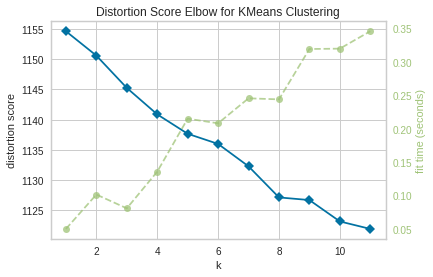

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
"""First cluster using KMeans and run the elbow visualizer to find the best number of clusters"""
modelKm = KMeans(random_state=12)
visualizer = KElbowVisualizer(modelKm, k=(1,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn

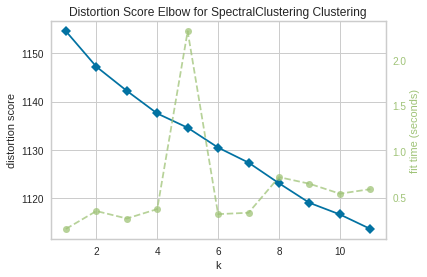

<AxesSubplot:title={'center':'Distortion Score Elbow for SpectralClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
"""First cluster using Spectral and run the elbow visualizer to find the best number of clusters"""
modelSc = SpectralClustering(random_state=5)
visualizer = KElbowVisualizer(modelSc, k=(1,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() 

[[ 0.05413693 -0.04270177]
 [ 0.13301709  0.04889555]
 [ 0.06155198 -0.05841173]
 [ 0.07065554 -0.11208323]]


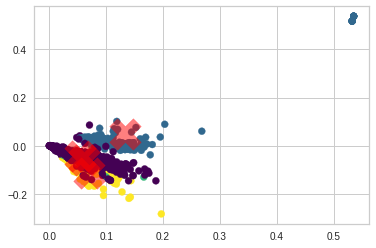

In [ ]:
"""Train the Kmeans with the best n of clusters"""
modelKm = KMeans(n_clusters=4,random_state=12)
modelKm.fit(X)
y_kmeans = modelKm.predict(X)

"""Dimensionality reduction used to plot in 2d representation"""
pc=TruncatedSVD(n_components=2)
X_new=pc.fit_transform(X)
centr=pc.transform(modelKm.cluster_centers_)

print(centr)
plt.scatter(X_new[:,0],X_new[:,1],c=y_kmeans, cmap='viridis')
plt.scatter(centr[:,0],centr[:,1],marker='X',alpha=0.5,color='red',s=1000)

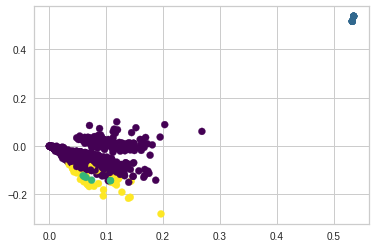

In [ ]:
modelSc = SpectralClustering(n_clusters=4, random_state=5)
y_spc=modelSc.fit_predict(X)


pc=TruncatedSVD(n_components=2)
X_new=pc.fit_transform(X)

plt.scatter(X_new[:,0],X_new[:,1],c=y_spc, cmap='viridis')

For both clustering algorithm the result seems similar from a graphical point of view. But let's inspect with wordcloud the most important words of each cluster.

In [ ]:
#Rebuild the clusters in pandas df.

df1['ClusterKmeans']=y_kmeans
df1['ClusterSpectral']=y_spc
df1.head()

,text,type,Tokenized,Clean_text,Clean_text1,ClusterKmeans,ClusterSpectral
0,@ACNI2012 @TheToka920 Never knew having 1 or 2...,sports,"[@, ACNI2012, @, TheToka920, Never, knew, havi...","[acni, thetoka, never, knew, followers, anythi...",acni thetoka never knew followers anything rea...,0,0
1,"MYCA Magical Moments:\n\nSeptember, 2011: Sham...",sports,"[MYCA, Magical, Moments, :, September, ,, 2011...","[myca, magical, moments, september, sham, chot...",myca magical moments september sham chotoo bow...,3,0
2,The current state of last year's @BBL finalist...,sports,"[The, current, state, of, last, year, 's, @, B...","[current, state, last, year, bbl, finalists, s...",current state last year bbl finalists starsbbl...,3,3
3,@HOLLYJISOO Why did you bring a cricket...,sports,"[@, HOLLYJISOO, Why, did, you, bring, a, crick...","[hollyjisoo, bring, cricket]",hollyjisoo bring cricket,3,3
4,Babar Azam only Pakistani included in the ICC ...,sports,"[Babar, Azam, only, Pakistani, included, in, t...","[babar, azam, pakistani, included, icc, odi, t...",babar azam pakistani included icc odi team yea...,3,3


In [ ]:
#Extract text based on cluster 
clus0_text=df1[df1['ClusterKmeans']==0]
clus1_text=df1[df1['ClusterKmeans']==1]
clus2_text=df1[df1['ClusterKmeans']==2]
clus3_text=df1[df1['ClusterKmeans']==3]
# clus4_text=df1[df1['ClusterKmeans']==4]

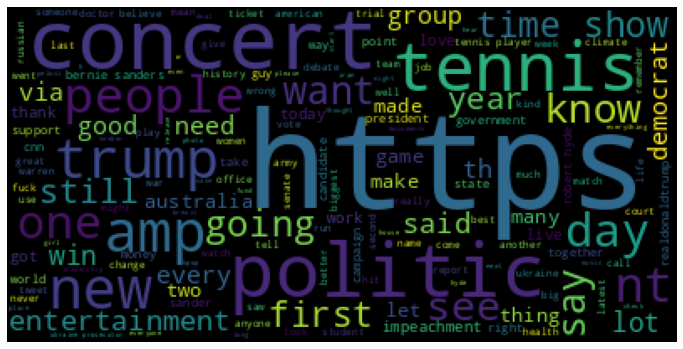

In [ ]:
plt.figure(figsize=(12,8))
word_cloud = WordCloud(background_color='black',max_font_size = 80).generate(" ".join(clus0_text['Clean_text1']))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

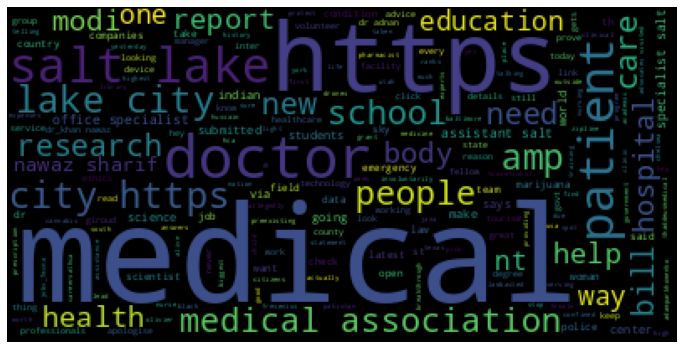

In [ ]:
plt.figure(figsize=(12,8))
word_cloud = WordCloud(background_color='black',max_font_size = 80).generate(" ".join(clus1_text['Clean_text1']))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

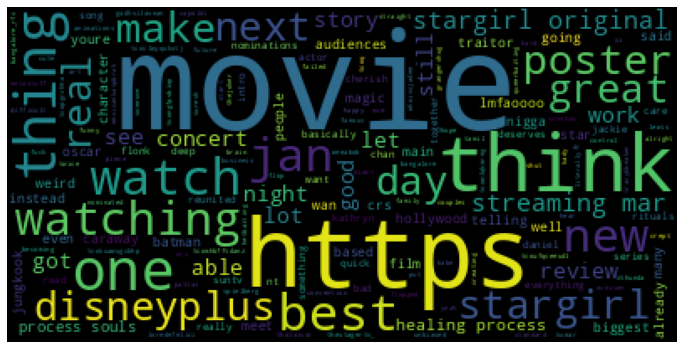

In [ ]:
plt.figure(figsize=(12,8))
word_cloud = WordCloud(background_color='black',max_font_size = 80).generate(" ".join(clus2_text['Clean_text1']))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

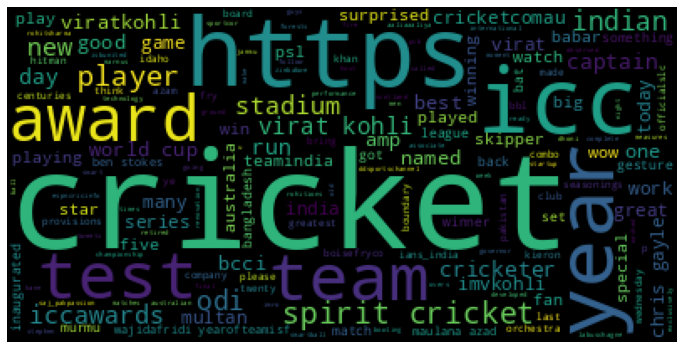

In [ ]:
plt.figure(figsize=(12,8))
word_cloud = WordCloud(background_color='black',max_font_size = 80).generate(" ".join(clus3_text['Clean_text1']))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [ ]:
# plt.figure(figsize=(12,8))
# word_cloud = WordCloud(background_color='black',max_font_size = 80).generate(" ".join(clus4_text['Clean_text1']))
# plt.imshow(word_cloud)
# plt.axis('off')
# plt.show()

In [ ]:
#Extract text based on cluster 
clus0_text_sp=df1[df1['ClusterSpectral']==0]
clus1_text_sp=df1[df1['ClusterSpectral']==1]
clus2_text_sp=df1[df1['ClusterSpectral']==2]
clus3_text_sp=df1[df1['ClusterSpectral']==3]
# clus4_text_sp=df1[df1['ClusterSpectral']==4]

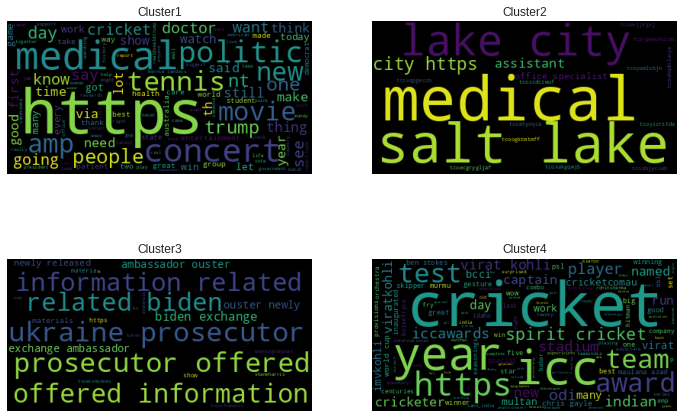

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.title('Cluster1')
word_cloud = WordCloud(background_color='black',max_font_size = 80).generate(" ".join(clus0_text_sp['Clean_text1']))
plt.imshow(word_cloud)
plt.axis('off')

plt.subplot(222)
plt.title('Cluster2')
word_cloud = WordCloud(background_color='black',max_font_size = 80).generate(" ".join(clus1_text_sp['Clean_text1']))
plt.imshow(word_cloud)
plt.axis('off')

plt.subplot(223)
plt.title('Cluster3')
word_cloud = WordCloud(background_color='black',max_font_size = 80).generate(" ".join(clus2_text_sp['Clean_text1']))
plt.imshow(word_cloud)
plt.axis('off')

plt.subplot(224)
plt.title('Cluster4')
word_cloud = WordCloud(background_color='black',max_font_size = 80).generate(" ".join(clus3_text_sp['Clean_text1']))
plt.imshow(word_cloud)
plt.axis('off')

# plt.subplot(224)
# plt.title('Cluster4')
# word_cloud = WordCloud(background_color='black',max_font_size = 80).generate(" ".join(clus4_text_sp['Clean_text1']))
# plt.imshow(word_cloud)
# plt.axis('off')


plt.show()